# Multiple Linear Regression on Salary Data. 

In [159]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import pandas as pd
import numpy as np
from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from pylab import*
import plotly as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import ipywidgets as widgets

* Import salary.csv as data using pd.read_csv method.

In [160]:
df = pd.read_csv("salary.csv")

* We use the .isnull().sum() method to check if there are any NaN values within the salary DataFrame.

In [161]:
df.isnull().sum()

salary         1
exprior        0
yearsworked    0
yearsrank      0
market         0
degree         0
otherqual      0
position       0
male           0
Field          0
yearsabs       0
dtype: int64

In [162]:
#Use .dropna() to drop all nan values.
df = df.dropna()

In [163]:
df.isnull().sum()

salary         0
exprior        0
yearsworked    0
yearsrank      0
market         0
degree         0
otherqual      0
position       0
male           0
Field          0
yearsabs       0
dtype: int64

In [164]:
#Check the data using the .describe() method.
df.describe()

salary     exprior  yearsworked   yearsrank      market  \
count    513.000000  513.000000   513.000000  513.000000  513.000000   
mean   50863.220098    2.931774    12.836257    7.046784    0.948558   
std    12685.132358    4.794327     9.447040    6.419708    0.149524   
min    29000.000000    0.000000     0.000000    0.000000    0.710000   
25%    40000.000000    0.000000     4.000000    2.000000    0.840000   
50%    50096.000000    1.000000    12.000000    5.000000    0.920000   
75%    60345.000000    4.000000    22.000000   12.000000    1.020000   
max    96156.000000   25.000000    41.000000   28.000000    1.330000   

           degree   otherqual    position        male       Field    yearsabs  
count  513.000000  513.000000  513.000000  513.000000  513.000000  513.000000  
mean     0.964912    0.044834    2.130604    0.750487    2.526316    6.994152  
std      0.184181    0.207142    0.819977    0.433153    1.126644   16.887552  
min      0.000000    0.000000    1.000000    0.000000    1.000000    0.000000  
25%      1.000000    0.000000    1.000000    1.000000    2.000000    0.000000  
50%      1.000000    0.000000    2.000000    1.000000    3.000000    1.000000  
75%      1.000000    0.000000    3.000000    1.000000    4.000000    2.000000  
max      1.000000    1.000000    3.000000    1.000000    4.000000  118.000000

# Split your data into a training and test set. 

* We will need to first split up our data into an X_array that contains the features to train on, and a y_array with the target variable, in this case the Salary column.

In [165]:
y = df['salary']
X = df.drop(['salary'], axis=1)

* We will need to first split up our data into an X_array that contains the features to train on, and a y_array with the target variable, in this case the Salary column.

* Below we use the train_test_split() fucntion to split the data, we will pass the variable X and y obtained above, along with test_size=0.20 which is used to indicate that the test data should be 20% of the total data and rest 80% should be train data with a random_state of 42.

In [166]:
y = df.salary
x = df.drop(['salary'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2, random_state=42)

In [167]:
print("X_train:")
X_train.head()


X_train:


salary  exprior  yearsworked  yearsrank  market  degree  otherqual  \
321  55608.00000        1           25         21    0.96       1          0   
330  48327.00000       25            2          2    0.78       1          0   
173  61453.00000        0           15          0    1.21       1          0   
273  65432.00000        0           23         12    0.99       1          0   
493  44410.85547        7           12         10    0.72       1          0   

     position  male  Field  yearsabs  
321         2     1      4         0  
330         2     1      4         1  
173         2     1      1         0  
273         3     1      1         1  
493         2     0      3        51

In [168]:
print("X_test:")

X_test.head()

X_test:


salary  exprior  yearsworked  yearsrank  market  degree  otherqual  \
305  48456.0        1           24         16    0.85       1          0   
497  48681.0        0           19         12    1.05       1          0   
440  41915.0        0           10          4    0.82       1          0   
153  42954.0        6            9          0    0.92       1          0   
499  45669.0        2           18          5    0.73       1          0   

     position  male  Field  yearsabs  
305         2     1      4         0  
497         2     0      4        52  
440         2     0      4         1  
153         3     1      3         1  
499         2     0      3        56

In [169]:
print(df_train.shape)
print(X_test.shape)

(411, 11)
(103, 11)


*  Train the multiple linear model.

In [170]:
X = sm.add_constant(X)
model = smf.ols(formula='salary ~ yearsworked + yearsrank + market + yearsabs', data=df_train).fit()

In [171]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 salary   R-squared:                       0.634
Model:                            OLS   Adj. R-squared:                  0.630
Method:                 Least Squares   F-statistic:                     175.9
Date:                Thu, 20 Jun 2019   Prob (F-statistic):           3.06e-87
Time:                        13:30:20   Log-Likelihood:                -4258.6
No. Observations:                 411   AIC:                             8527.
Df Residuals:                     406   BIC:                             8547.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    3301.4132   2609.847      1.265      0.207   -1829.088    8431.915
yearsworked   604.1568     68.021      8.882      0.000     470.440     737.873
yearsrank     542.3645    100.230      5.411      0.000     345.330     739.399
market        3.82e+04   2607.622     14.649      0.000    3.31e+04    4.33e+04
yearsabs      -19.4291     22.842     -0.851      0.395     -64.332      25.474
==============================================================================
Omnibus:                       70.112   Durbin-Watson:                   2.199
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              136.909
Skew:                           0.937   Prob(JB):                     1.86e-30
Kurtosis:                       5.117   Cond. No.                         203.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [172]:
# create variable for selected columns.
featured_cols = ['degree', 'position', 'Field', 'male']

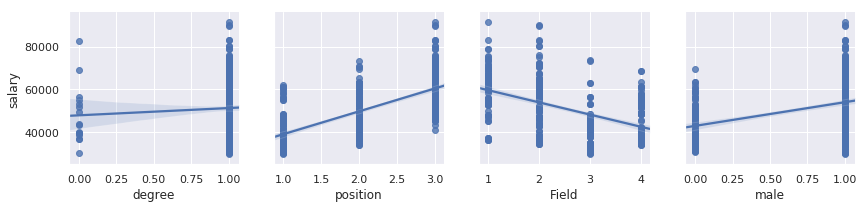

In [173]:
# multiple scatter plots in Seaborn
sns.pairplot(X_train, x_vars=featured_cols, y_vars='salary', kind='reg',height=3)

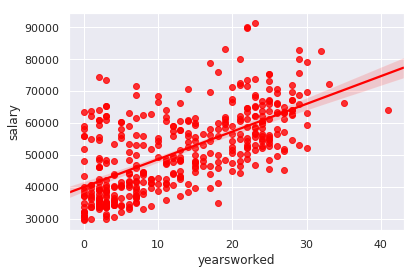

In [200]:
sns.set(color_codes=True)
sns.regplot(x="yearsworked", y="salary", color = "red", data=X_train);

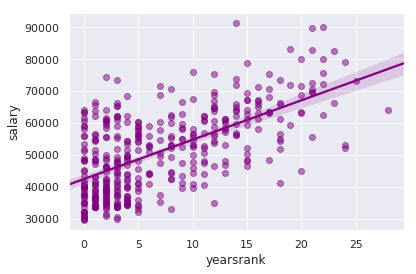

In [175]:

# Seaborn scatter plot with regression line
sns.regplot(x='yearsrank', y='salary', data=X_train, color="purple", scatter_kws={'alpha':0.5})

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


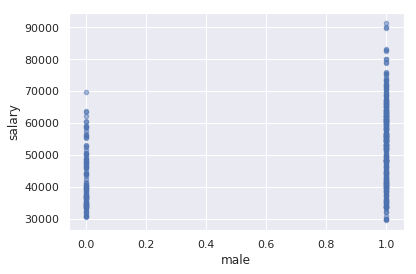

In [176]:
X_train.plot(kind='scatter', x='male', y='salary', alpha=0.5)

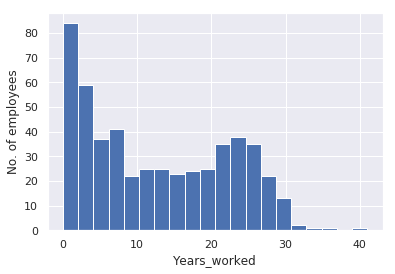

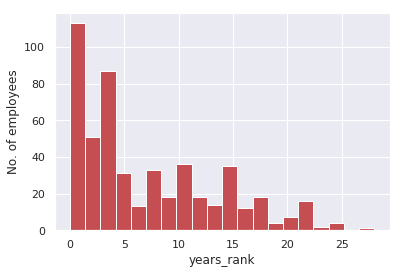

In [177]:

df["yearsworked"].hist(color="b", bins=20, alpha=1.0)
plt.xlabel("Years_worked")
plt.ylabel("No. of employees")
plt.show()

df["yearsrank"].hist(color="r", bins=20, alpha=1.0)
plt.xlabel("years_rank")
plt.ylabel("No. of employees")

plt.show()

Text(0, 0.5, 'No. of employees')

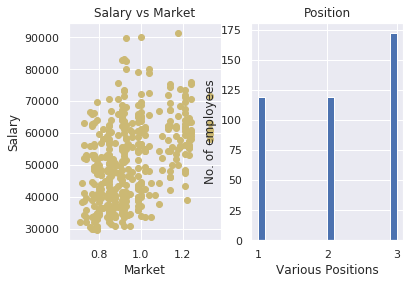

In [178]:
subplot(1,2,1)
plt.scatter(X_train['market'], X_train['salary'], c='y')
plt.title("Salary vs Market")
plt.xlabel("Market")
plt.ylabel("Salary")

subplot(1,2,2)
plt.hist(X_train['position'],data=X_train, bins=20)
plt.title("Position")
plt.xlabel("Various Positions")
plt.ylabel("No. of employees")


### 2.One-hot encode the variable Field into three dummy variables, using HR as the reference category. You can use pandas' get_dummies() function for this.

In [179]:
#Replace 1,2,3,4 with (' Engineering', 'Finance', 'Human Resources', 'Marketing')
df['Field'] = df['Field'].replace([1,2,3,4],[' Engineering', 'Finance', 'Human Resources', 'Marketing'])

In [180]:
HR = pd.get_dummies(df["Field"])

In [181]:
HR.head()

Engineering  Finance  Human Resources  Marketing
0             0        0                1          0
1             0        1                0          0
2             0        0                1          0
3             0        0                0          1
4             0        0                0          1

In [182]:
#X_train.plot(kind='scatter', x="Field", y='salary', alpha=0.9)

In [183]:
#Replace all 1 with 'Male' and 0 with 'Female'
df['male'] = df['male'].replace([1,0],['Male','Female'])

In [184]:
MF = pd.get_dummies(df["male"])

In [185]:
MF.head()

Female  Male
0       0     1
1       0     1
2       0     1
3       0     1
4       0     1

In [186]:
#Replace all 1 with 'Yes' and 0 with 'No'
df['degree'] = df['degree'].replace([1,0],['Yes','No'])

In [187]:
DG = pd.get_dummies(df["degree"])

In [188]:
DG.head()

No  Yes
0   0    1
1   0    1
2   0    1
3   0    1
4   0    1

In [189]:
#Replace all 1 with 'Junior Employee', 2 with 'Manager' and 3 with 'Executive'.
df['position'] = df['position'].replace([1, 2, 3],['junior employee','manager', 'Executive'])

In [190]:
PS = pd.get_dummies(df["position"])

In [191]:
PS.head()

Executive  junior employee  manager
0          0                1        0
1          0                1        0
2          0                1        0
3          0                1        0
4          0                1        0

In [192]:
import plotly
import plotly.graph_objs as go

plotly.offline.init_notebook_mode(connected=True)

plotly.offline.iplot({
    "data": [go.Histogram(x=X_train.yearsabs, y=X_train["salary"])],
    "layout": go.Layout(title="Salary ~ Yearsabs")
})

### 3. Produce a correlation matrix comparing the relationship of salary to the predictor variables. Is there any multicollinearity or other problems that may be a problem in the multiple regression?

In [193]:
#create corr_Xtrain form the X-training data.
corr_X_train = X_train.corr()
#display the correlation of the X_train data.
corr_X_train.style.background_gradient(cmap='coolwarm').set_precision(3)

Multicollinearity is problem that you can run into when you’re fitting a regression model, or other linear model. It refers to predictors that are correlated with other predictors in the model. Unfortunately, the effects of multicollinearity can feel murky and intangible, which makes it unclear whether it’s important to fix. (https://blog.minitab.com/blog/adventures-in-statistics-2/what-are-the-effects-of-multicollinearity-and-when-can-i-ignore-them)

* Yes there is multiconlinearity in the model.

### 4. Run the multiple linear regression and interpret the standardised coefficients given in the statsmodels output. What are the most important features when predicting employee salary?

* Run a Multiple Leanear model (mlm) with all varibles

In [194]:
#X = sm.add_constant(X)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 salary   R-squared:                       0.634
Model:                            OLS   Adj. R-squared:                  0.630
Method:                 Least Squares   F-statistic:                     175.9
Date:                Thu, 20 Jun 2019   Prob (F-statistic):           3.06e-87
Time:                        13:30:24   Log-Likelihood:                -4258.6
No. Observations:                 411   AIC:                             8527.
Df Residuals:                     406   BIC:                             8547.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    3301.4132   2609.847      1.265      0.207   -1829.088    8431.915
yearsworked   604.1568     68.021      8.882      0.000     470.440     737.873
yearsrank     542.3645    100.230      5.411      0.000     345.330     739.399
market        3.82e+04   2607.622     14.649      0.000    3.31e+04    4.33e+04
yearsabs      -19.4291     22.842     -0.851      0.395     -64.332      25.474
==============================================================================
Omnibus:                       70.112   Durbin-Watson:                   2.199
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              136.909
Skew:                           0.937   Prob(JB):                     1.86e-30
Kurtosis:                       5.117   Cond. No.                         203.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [195]:
# Display the coefficients derived from the mlm above using the .params method.
model.params

Intercept       3301.413238
yearsworked      604.156792
yearsrank        542.364537
market         38198.450716
yearsabs         -19.429079
dtype: float64

* The most important features when predicting employee salaries from the salary data are the position that the employee is in, the years that they have worked (experience) and whether they hold a degree on not.

### 5. Calculate the standardised residuals (resid()) and standardised predicted values (fittedvalues()).

* Below we use the .head(8) method on the .resid() function to display the first 8 standardised residuals values.

In [196]:
mlm.resid.head()

NameError: name 'mlm' is not defined

* Below we use the .head(8) method on the .fittedvalues() function to display the first 8 standardised predicted values.

In [ ]:
mlm.fittedvalues.head(8)

### 6. Plot the residuals versus the predicted values using seaborn's residplot with fitted values as the x parameter, and the dependent variable as y. lowess=True.

In [ ]:
sns.residplot(mlm.fittedvalues, mlm.resid, lowess=True, color="teal")

## Now run your model on the test set.

* We use the mlm model to predict test data.

In [ ]:
predictions = mlm.predict(X_test)

*  Here we predict the first 5 predictions.

In [ ]:
predictions[0:5]

*  The multiple linear model used on y_test data.

In [ ]:
plt.scatter(predictions, y_test)
plt.xlabel('Predictions')
plt.ylabel('True Values')

### 7. How does your model compare when running it on the test set - what is the difference in the Root Mean Square Error (RMSE) between the training and test sets?

In [ ]:
mlm.params

In [ ]:
# The coefficients
print('Coefficients: \n', mlm.coef_)

In [ ]:
# The mean squared error
print("Mean squared error: %.2f"
      % np.mean((mlm.predict(X_test) - y_test) ** 2))

In [ ]:
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % mlm.score(X_test, y_test))

In [ ]:
print("Score:",mlm.score(X_test, y_test))